# Wells Clustering Problem

<h2><b>Task</b></h2>

Серьёзной проблемой, возникающей на ранних стадиях разработки нефтегазовых месторождений, является недостаточный объём информации о параметрах этих месторождений. Неверно оценённые параметры грозят большими погрешностями в оценке залегающих объёмов нефти и газа, что приносит экономические убытки компании, которая разрабатывает месторождение. Именно поэтому оценка пропущенных параметров месторождений – это важная и актуальная промышленная задача, которая осложняется ещё и тем фактом, что параметры представляют собой как непрерывные, так и категориальные значения.

<img src="./src/bakersfield.jpg">

<p> </p>
<h2><b>Evaluation</b></h2>

Оценка качества вычисляется по формуле <b>= 0.5 * accuracy_score + 0.5 * r2_score</b>

<img src="./src/accuracy.jpeg">
<img src="./src/r_squared.gif">

<p>Следовательно, <b>максимальное</b> значение метрики соответствует - <b>1</b>.</p>
<p> </p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./dataset_for_participants.csv')

In [3]:
df

,N,1. Field name,2. Reservoir unit,3. Country,4. Region,5. Basin name,6. Tectonic regime,7. Latitude,8. Longitude,9. Operator company,...,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.00
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.00
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH/DELTA,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.00
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.00
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION/EVAPORITE,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT/FORELAND,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1060,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,OIL,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.2,121.00
510,1061,ZAOYUAN,KONGDIAN-2 (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,NaN,38.2100,117.0600,PETROCHINA,...,OIL,PLATEAU PRODUCTION,RIFT,7579,PALEOGENE,SANDSTONE,295.0,79.0,NaN,60.00
511,1062,ZAOYUAN,UNNAMED (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,OIL,MATURE PRODUCTION,RIFT,9843,MESOZOIC,VOLCANICS,492.0,194.0,12.7,3.59
512,1070,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,...,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.00


In [4]:
def info():
    print('''            1. Field name - название месторождения\n
            2. Reservoir unit - юнит месторождения\n
            3. Country - страна расположения\n
            4. Region - регион расположения\n
            5. Basin name - название бассейна пород\n
            6. Tectonic regime - тектонический режим\n
            7. Latitude - широта\n
            8. Longitude - долгота\n
            9. Operator company - название компании\n
            10. Onshore or oﬀshore - на суше или нет\n
            11. Hydrocarbon type (main) - тип углеводорода\n
            12. Reservoir status (current) - статус месторождения\n
            13. Structural setting - структурные свойства\n
            14. Depth (top reservoir ft TVD) - глубина\n
            15. Reservoir period - литологический период\n
            16. Lithology (main) - литология\n
            17. Thickness (gross average ft) - общая толщина\n
            18. Thickness (net pay average ft) - эффективная толщина\n
            19. Porosity (matrix average %) - пористость\n
            20. Permeability (air average mD) – проницаемость\n''')

In [5]:
def cat_num_split(data):
    return data.dtypes[data.dtypes == 'object'].keys(), data.dtypes[data.dtypes != 'object'].keys()

In [6]:
def corrmat(data):
    plt.figure(figsize=(15,10))
    sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}).set_title("Correlation Matrix")
    plt.show()

In [7]:
cat_cols, num_cols = cat_num_split(df)

In [8]:
info()

            1. Field name - название месторождения

            2. Reservoir unit - юнит месторождения

            3. Country - страна расположения

            4. Region - регион расположения

            5. Basin name - название бассейна пород

            6. Tectonic regime - тектонический режим

            7. Latitude - широта

            8. Longitude - долгота

            9. Operator company - название компании

            10. Onshore or oﬀshore - на суше или нет

            11. Hydrocarbon type (main) - тип углеводорода

            12. Reservoir status (current) - статус месторождения

            13. Structural setting - структурные свойства

            14. Depth (top reservoir ft TVD) - глубина

            15. Reservoir period - литологический период

            16. Lithology (main) - литология

            17. Thickness (gross average ft) - общая толщина

            18. Thickness (net pay average ft) - эффективная толщина

            19. Porosity (matrix average %)

Text(0.5, 1.0, 'Missing values map')

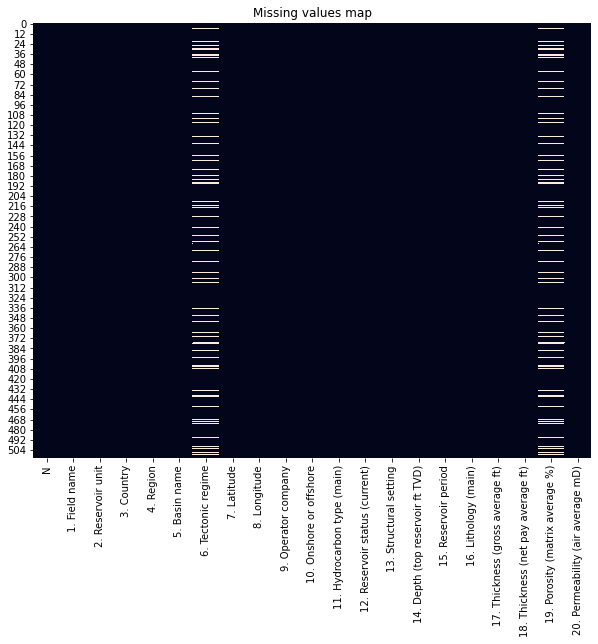

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False).set_title('Missing values map')

<p>Значения отсутствуют в колонках <b>Tectonic regime</b> и <b>Porosity (matrix average %)</b>.</p>

In [10]:
df.isnull().sum()

N                                      0
1. Field name                          0
2. Reservoir unit                      0
3. Country                             0
4. Region                              0
5. Basin name                          0
6. Tectonic regime                    72
7. Latitude                            0
8. Longitude                           0
9. Operator company                    0
10. Onshore or offshore                0
11. Hydrocarbon type (main)            0
12. Reservoir status (current)         0
13. Structural setting                 0
14. Depth (top reservoir ft TVD)       0
15. Reservoir period                   0
16. Lithology (main)                   0
17. Thickness (gross average ft)       0
18. Thickness (net pay average ft)     0
19. Porosity (matrix average %)       72
20. Permeability (air average mD)      0
dtype: int64

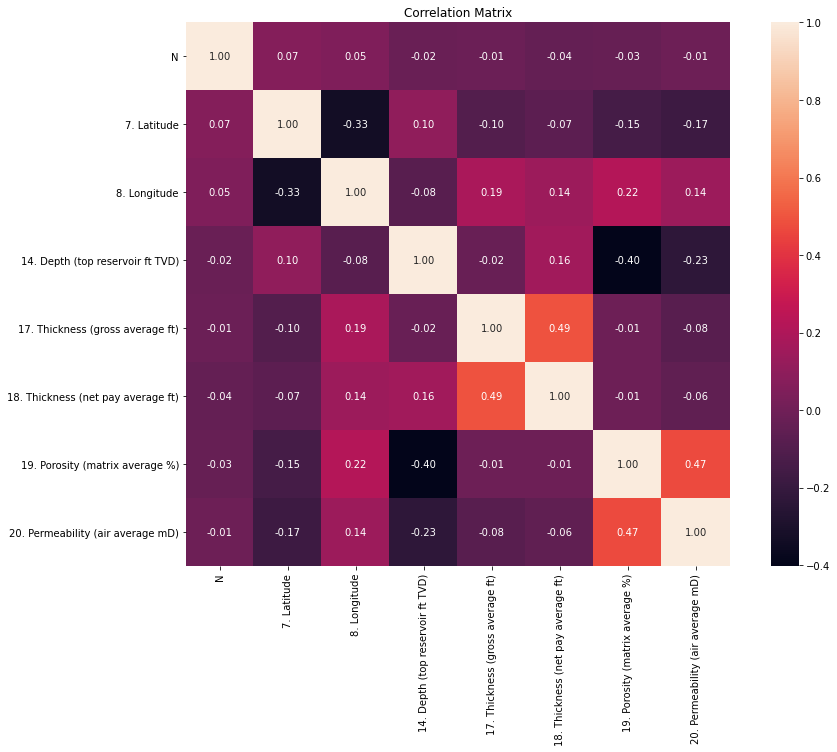

In [11]:
corrmat(df)

In [12]:
drop_columns = ['N', '1. Field name', '2. Reservoir unit', '4. Region', '7. Latitude', '17. Thickness (gross average ft)', '9. Operator company']

In [13]:
data = df

data.drop(drop_columns, inplace=True, axis=1)

tectonic_regime_label = data.pop('6. Tectonic regime')
porosity_label = data.pop('19. Porosity (matrix average %)')

data

,3. Country,5. Basin name,8. Longitude,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),18. Thickness (net pay average ft),20. Permeability (air average mD)
0,SAUDI ARABIA,THE GULF,49.8100,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,184.0,410.00
1,EGYPT,ABU GHARADIG,28.4925,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,144.0,8.00
2,EGYPT,NILE DELTA,31.3616,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH/DELTA,9843,NEOGENE,THINLY-BEDDED SANDSTONE,66.0,200.00
3,EGYPT,NILE DELTA,31.3616,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,410.0,300.00
4,OMAN,FAHUD SALT,56.0452,ONSHORE,OIL,REJUVENATING,SALT/FORELAND,4955,CRETACEOUS,LIMESTONE,100.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
509,CHINA,BOHAI,117.0600,ONSHORE,OIL,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,62.0,121.00
510,CHINA,BOHAI,117.0600,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,7579,PALEOGENE,SANDSTONE,79.0,60.00
511,CHINA,BOHAI,117.0600,ONSHORE,OIL,MATURE PRODUCTION,RIFT,9843,MESOZOIC,VOLCANICS,194.0,3.59
512,RUSSIA,VOLGA-URAL,44.8042,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,33.0,30.00


In [14]:
from scipy.spatial.distance import squareform, pdist
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import SpectralClustering

In [15]:
cat_cols, num_cols = cat_num_split(data)

In [16]:
le = LabelEncoder()

for cat_col in cat_cols:
    data[cat_col] = le.fit_transform(data[cat_col])

data

,3. Country,5. Basin name,8. Longitude,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),18. Thickness (net pay average ft),20. Permeability (air average mD)
0,37,104,49.8100,1,5,8,7,6050,12,9,184.0,410.00
1,13,0,28.4925,1,3,5,23,10282,7,11,144.0,8.00
2,13,61,31.3616,1,2,2,48,9843,15,15,66.0,200.00
3,13,61,31.3616,1,2,2,48,10499,15,11,410.0,300.00
4,32,28,56.0452,1,5,8,27,4955,7,9,100.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
509,9,9,117.0600,1,5,2,23,4721,17,11,62.0,121.00
510,9,9,117.0600,1,5,7,23,7579,17,11,79.0,60.00
511,9,9,117.0600,1,5,5,23,9843,14,16,194.0,3.59
512,36,113,44.8042,1,5,2,7,1870,4,11,33.0,30.00


In [17]:
distances = squareform(pdist(data, metric='jaccard'))

In [18]:
s_clust = SpectralClustering()

sc_pred = s_clust.fit_predict(distances)

In [19]:
set(sc_pred)

{0, 1, 2, 3, 4, 5, 6, 7}

In [65]:
new_df = pd.read_csv('./dataset_for_participants.csv')

In [66]:
new_df

,N,1. Field name,2. Reservoir unit,3. Country,4. Region,5. Basin name,6. Tectonic regime,7. Latitude,8. Longitude,9. Operator company,...,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.00
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.00
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH/DELTA,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.00
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.00
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION/EVAPORITE,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT/FORELAND,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1060,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,OIL,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.2,121.00
510,1061,ZAOYUAN,KONGDIAN-2 (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,NaN,38.2100,117.0600,PETROCHINA,...,OIL,PLATEAU PRODUCTION,RIFT,7579,PALEOGENE,SANDSTONE,295.0,79.0,NaN,60.00
511,1062,ZAOYUAN,UNNAMED (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,OIL,MATURE PRODUCTION,RIFT,9843,MESOZOIC,VOLCANICS,492.0,194.0,12.7,3.59
512,1070,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,...,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.00


In [67]:
new_df['Cluster'] = sc_pred
new_df

,N,1. Field name,2. Reservoir unit,3. Country,4. Region,5. Basin name,6. Tectonic regime,7. Latitude,8. Longitude,9. Operator company,...,12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD),Cluster
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,...,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.00,0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.00,0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,DECLINING PRODUCTION,WRENCH/DELTA,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.00,0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.00,0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION/EVAPORITE,21.9607,56.0452,PDO,...,REJUVENATING,SALT/FORELAND,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1060,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.2,121.00,0
510,1061,ZAOYUAN,KONGDIAN-2 (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,NaN,38.2100,117.0600,PETROCHINA,...,PLATEAU PRODUCTION,RIFT,7579,PALEOGENE,SANDSTONE,295.0,79.0,NaN,60.00,0
511,1062,ZAOYUAN,UNNAMED (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,MATURE PRODUCTION,RIFT,9843,MESOZOIC,VOLCANICS,492.0,194.0,12.7,3.59,0
512,1070,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,...,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.00,0


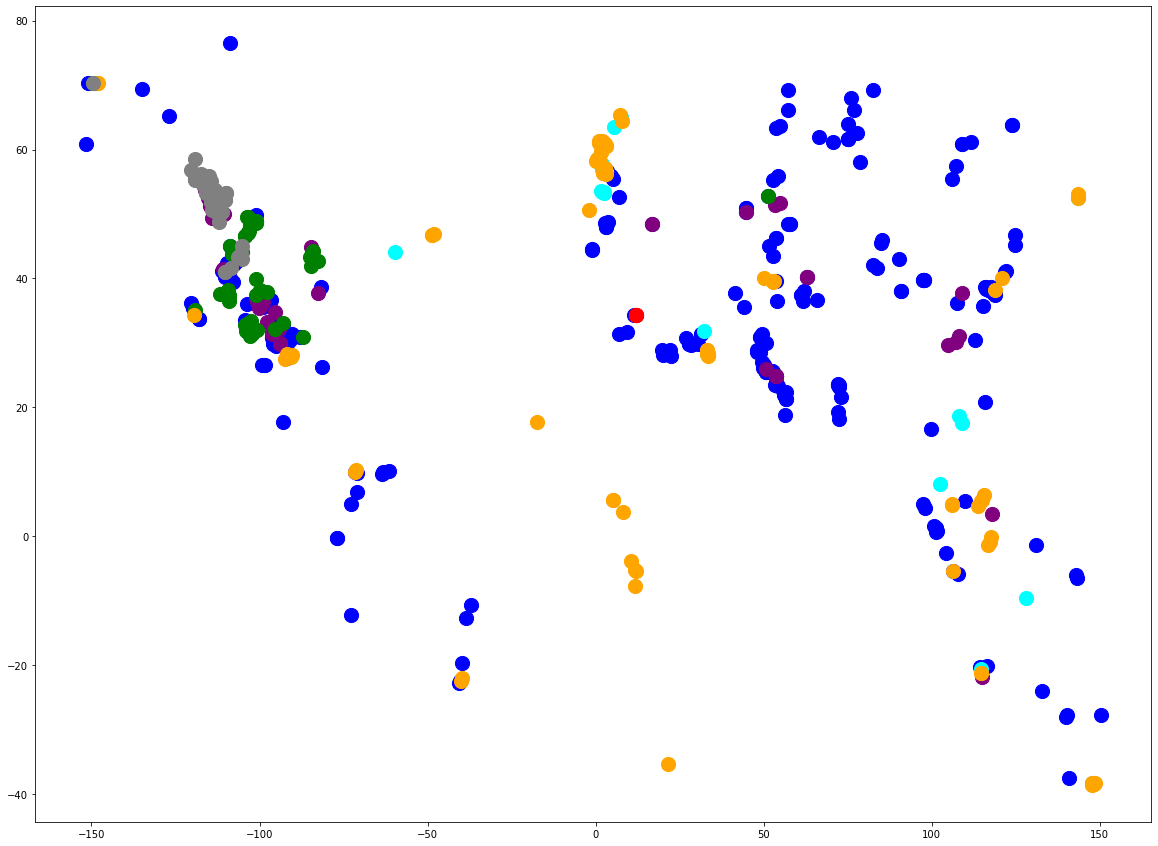

In [68]:
plt.figure(figsize=(20, 15))

colors = ['blue', 'pink', 'purple', 'red', 'cyan', 'green', 'orange', 'grey']

for cluster, clr in zip(set(sc_pred), colors):
    plt.scatter(new_df[new_df['Cluster'] == cluster]['8. Longitude'], new_df[new_df['Cluster'] == cluster]['7. Latitude'], s=200, color=clr)

# Plotly plots

In [24]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


trace1 = go.Scatter3d(
    x = new_df['8. Longitude'],
    y = new_df['7. Latitude'],
    z = new_df['14. Depth (top reservoir ft TVD)'],
    mode='markers',
    
    marker=dict(
                color = new_df['Cluster'], 
                size= 10,
                line=dict(
                          color= new_df['Cluster'],
                          width= 12
                         ),
                opacity=0.8
               )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Longitude'),
            yaxis = dict(title  = 'Latitude'),
            zaxis = dict(title  = 'Depth')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [70]:
from scipy import stats

for cluster in set(new_df.Cluster):
    new_df.loc[(new_df['19. Porosity (matrix average %)'].isna() == True) & (new_df.Cluster == cluster), ['19. Porosity (matrix average %)']] = new_df[(new_df['19. Porosity (matrix average %)'].isna() == False) & (new_df.Cluster == cluster)]['19. Porosity (matrix average %)'].values.mean()
    new_df.loc[(new_df['6. Tectonic regime'].isna() == True) & (new_df.Cluster == cluster), ['6. Tectonic regime']] = stats.mode(new_df[(new_df['6. Tectonic regime'].isna() == False) & (new_df.Cluster == cluster)]['6. Tectonic regime'].values)[0][0]

In [73]:
new_df['19. Porosity (matrix average %)']

0      21.000000
1      10.000000
2      22.000000
3      20.000000
4      21.000000
         ...    
509    23.200000
510    19.291667
511    12.700000
512    24.000000
513    26.000000
Name: 19. Porosity (matrix average %), Length: 514, dtype: float64

In [71]:
new_df

,N,1. Field name,2. Reservoir unit,3. Country,4. Region,5. Basin name,6. Tectonic regime,7. Latitude,8. Longitude,9. Operator company,...,12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD),Cluster
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,...,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.000000,410.00,0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.000000,8.00,0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,DECLINING PRODUCTION,WRENCH/DELTA,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.000000,200.00,0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,...,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.000000,300.00,0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION/EVAPORITE,21.9607,56.0452,PDO,...,REJUVENATING,SALT/FORELAND,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.000000,60.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1060,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.200000,121.00,0
510,1061,ZAOYUAN,KONGDIAN-2 (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,COMPRESSION/EVAPORITE,38.2100,117.0600,PETROCHINA,...,PLATEAU PRODUCTION,RIFT,7579,PALEOGENE,SANDSTONE,295.0,79.0,19.291667,60.00,0
511,1062,ZAOYUAN,UNNAMED (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,...,MATURE PRODUCTION,RIFT,9843,MESOZOIC,VOLCANICS,492.0,194.0,12.700000,3.59,0
512,1070,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,...,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.000000,30.00,0


In [74]:
new_df.to_csv('C:/Файлы и документы/answer.csv', index=False)

In [76]:
new_df.isna().sum()

N                                     0
1. Field name                         0
2. Reservoir unit                     0
3. Country                            0
4. Region                             0
5. Basin name                         0
6. Tectonic regime                    0
7. Latitude                           0
8. Longitude                          0
9. Operator company                   0
10. Onshore or offshore               0
11. Hydrocarbon type (main)           0
12. Reservoir status (current)        0
13. Structural setting                0
14. Depth (top reservoir ft TVD)      0
15. Reservoir period                  0
16. Lithology (main)                  0
17. Thickness (gross average ft)      0
18. Thickness (net pay average ft)    0
19. Porosity (matrix average %)       0
20. Permeability (air average mD)     0
Cluster                               0
dtype: int64